In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
from particle_filter import filter
from models import logistic_model,AR_model
from pmcmc import PMCMC
from scipy.integrate import odeint
from scipy.stats import norm,gamma,uniform,expon

<Figure size 640x480 with 0 Axes>

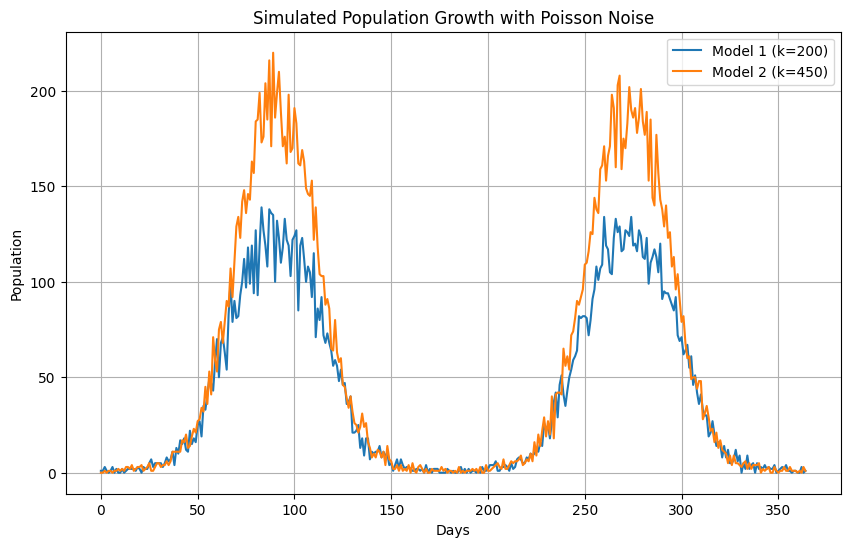

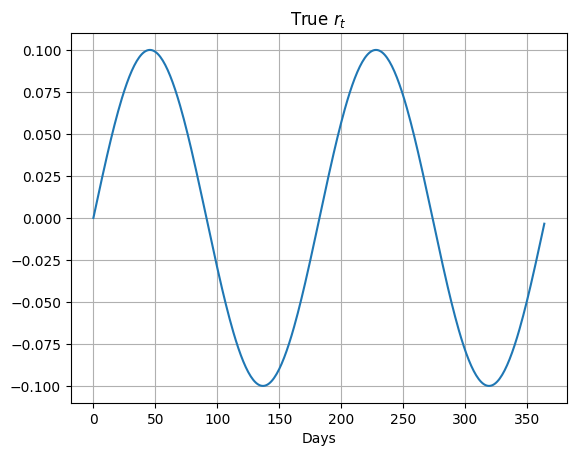

In [2]:
num_models = 2
rng = np.random.default_rng(6)
period = 365/2.0
d=365

#r(t) is the growth rate of the population at time t
#max growth rate is 0.3 with time period of 365 days
def r_t(t):
    return 0.10*np.sin(2*np.pi*t/period)

def growthEQ(y,t,pars):
    r,k = pars
    return r(t)*y*(1 - (y/k))

#states is the initial population of the models
states = np.ones(num_models)

#k_vals is the carrying capacity of the population
#k_vals = np.array([rng.integers(10,50) for _ in range(num_models)])
k_vals = np.array([200,450])

#data is the population of the models at each time step
data = np.zeros((num_models, d))

#first dimension is the parameters with the first row being the growth rate and the second row being the carrying capacity
par = np.zeros((2,num_models,d)) #(num_parameters,num_models,len(time_series))

data[:,0] = np.ones((num_models,))

data = odeint(func = lambda y,t: growthEQ(y,t,(r_t,k_vals)),y0=data[:,0],t=np.linspace(0,d,d)).T

#extract daily data
#add poisson noise to the data
data = rng.poisson(data)

# Create plot for data 
fig=plt.figure()
plt.figure(figsize=(10, 6))
for i in range(num_models):
    plt.plot(np.arange(d), data[i,:], label=f'Model {i+1} (k={k_vals[i]})')


plt.title('Simulated Population Growth with Poisson Noise')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


fig=plt.figure()
plt.title('True $r_t$')
plt.xlabel('Days')
plt.grid(True)
plt.plot([r_t(t) for t in range(d)])
plt.show()
